In [86]:
import numpy as np
import matplotlib.image as img

# 1. Face Recognition module

In [15]:
import face_recognition
import os

def get_cropped_face(image_file):
    cropped_face = []
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
    
    return cropped_face

In [3]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [67]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img = os.path.join(dir_path, file)
        face = get_cropped_face(img)
        if len(face) > 0:
            emb = get_face_embedding(face)
            if len(emb) > 0:
                embedding_dict[os.path.splitext(file)[0]] = emb[0]
        
    return embedding_dict

In [53]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=1)

In [66]:
# test for one picture
import os

dir_path = os.getenv('HOME')+'/aiffel/E05/data/가희.jpg'

face = get_cropped_face(dir_path)
emb = get_face_embedding(face)
type(emb)
type(emb[0])
emb[0]

array([-0.13403761,  0.08634745,  0.06613398, -0.09530203, -0.08482064,
        0.03818229, -0.12928592, -0.14164814,  0.12430955, -0.14675985,
        0.2114891 , -0.08964195, -0.17137684, -0.07622375, -0.08076004,
        0.21462128, -0.22900301, -0.18475619,  0.00041519,  0.01625113,
        0.1398268 , -0.00388089, -0.00286188,  0.07992187, -0.12973264,
       -0.31811672, -0.09804094, -0.07870491,  0.0045895 , -0.07811713,
       -0.05908909,  0.03343482, -0.17878209,  0.01680444,  0.00203404,
        0.14714906,  0.01195009, -0.12286361,  0.16452721,  0.01249673,
       -0.30536804,  0.11230981,  0.08825861,  0.18308587,  0.20107311,
       -0.00841167, -0.00270505, -0.13707218,  0.18149723, -0.1547347 ,
        0.02446987,  0.18996634,  0.12901059,  0.04895946,  0.02384632,
       -0.11627737,  0.06326893,  0.08680174, -0.13888489, -0.02058254,
        0.11041682, -0.10040918,  0.09095432, -0.08487668,  0.12412108,
        0.11114324, -0.02629801, -0.28829557,  0.16012968, -0.13

In [21]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [89]:
def get_nearest_face(name, dir_path, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    print('target : {}'.format(name))
    image = img.imread(os.path.join(dir_path, name + '.jpg'))
    plt.imshow(image)
    plt.show()
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image = img.imread(os.path.join(dir_path, sorted_faces[i][0] + '.jpg'))
            plt.imshow(image)
            plt.show()

### Result

In [68]:
import os

dir_path = os.getenv('HOME')+'/aiffel/E05/data/'

embedding_dict = get_face_embedding_dict(dir_path)

target : 김수연


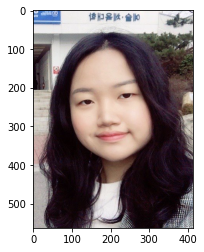

순위 1 : 이름(고성희), 거리(2.947268398478627)


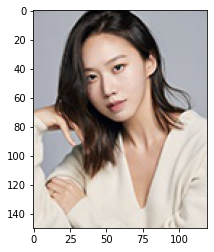

순위 2 : 이름(송민재), 거리(3.0164059640374035)


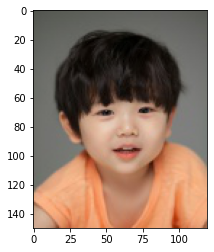

순위 3 : 이름(김보민), 거리(3.0391769057605416)


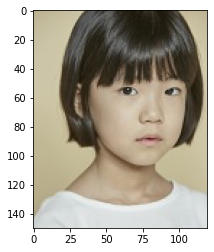

순위 4 : 이름(소아린), 거리(3.0410627003293484)


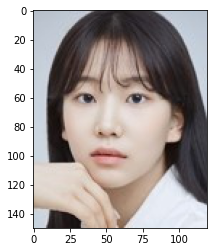

순위 5 : 이름(진지희), 거리(3.070076003903523)


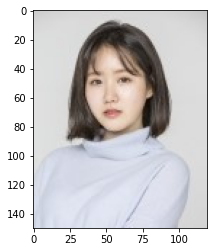

In [90]:
get_nearest_face('김수연', dir_path)

In [ ]:
# TODO : 시각화
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=5)
tsne_v = tsne.fit_transform(z[:6000])

In [ ]:
# TODO : 시각화
import face_recognition
from sklearn.manifold import MDS

# 2. Average hasing

In [1]:
from PIL import Image
import numpy as np

dir_path = os.getenv('HOME')+'/aiffel/E05/data/가희.jpg'

face = get_cropped_face(dir_path)

# convert hash
def average_hash(face, size = 16):
    img